In [44]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [45]:
nenana = pd.read_csv("nenana.csv")

In [46]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

In [47]:
dates = []
for i in nenana["Date & Time"]:
    dates.append(str(i))

In [48]:
years = list(nenana['Year'])

In [49]:
# Each months and days list has 87 rows

months = []
days = []

for i in dates:
    space = 0
    month = ""
    day = ""
    
    for j in i:
        if j == " ":
            space += 1
        elif not j.isdigit():
            month += j
        elif j.isdigit():
            day += j
        if space == 2:
            days.append(int(day))
            months.append(month_dict[month])
            break

In [50]:
# Getting rid of 2004 at the end for 87 rows
nenana = nenana[:len(nenana)-1]

In [51]:
# Get the days it takes to get to spring every year
spring_list = []
for i in range(len(months)):
    date_spring = datetime(years[i], months[i], days[i]) - datetime(years[i], 1, 1)
    spring_list.append(date_spring.days)

In [52]:
nenana["Spring_Days"] = spring_list

In [53]:
earlier = nenana.loc[nenana['Year'] < 1960]
later = nenana.loc[nenana['Year'] >= 1960]

In [54]:
early_mean = earlier['Spring_Days'].mean()
late_mean = later['Spring_Days'].mean()

In [55]:
early_mean_list = []
late_mean_list = []

for i in range(1917, 2004):
    if i < 1960:
        early_mean_list.append(early_mean)
        late_mean_list.append(None)
    else:
        early_mean_list.append(None)
        late_mean_list.append(late_mean)

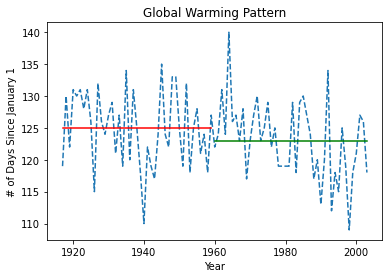

In [74]:
plt.plot(nenana["Year"], nenana["Spring_Days"],  linestyle='--')
plt.plot(range(1917, 2004), early_mean_list, color='r')
plt.plot(range(1917, 2004), late_mean_list, 'g')

plt.xlabel('Year')
plt.ylabel('# of Days Since January 1')
plt.title('Global Warming Pattern')
plt.show()